In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from keras.datasets import mnist

In [2]:
def generate_binary_dataset(min_value, max_value, size, positive_condition):
    data = pd.DataFrame(
        np.concatenate((
            np.random.uniform(min_value, max_value, (size, 2)),
            -np.ones((size, 1))), axis=1), 
        columns=['x', 'y', 'target'])
    data.target[positive_condition(data.x, data.y)] = 1
    return data

In [3]:
def plot_separator(svc):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, label="support vectors", facecolors='none', edgecolors='k')

In [4]:
def plot_binary(data, svc=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(data.x, data.y, c=data.target, label="data", s=30, cmap=plt.cm.Paired)
    
    if svc:
        plot_separator(svc)
    
    plt.grid()
    plt.legend()

In [12]:
dataset = generate_binary_dataset(-4, 4, 500, lambda x, y: x - y > 1)
dataset.head()

x         y  target
0 -1.299933 -2.493431     1.0
1 -0.363915  1.068871    -1.0
2 -0.909500  0.874467    -1.0
3 -0.626918 -2.468596     1.0
4 -2.588393  1.105290    -1.0

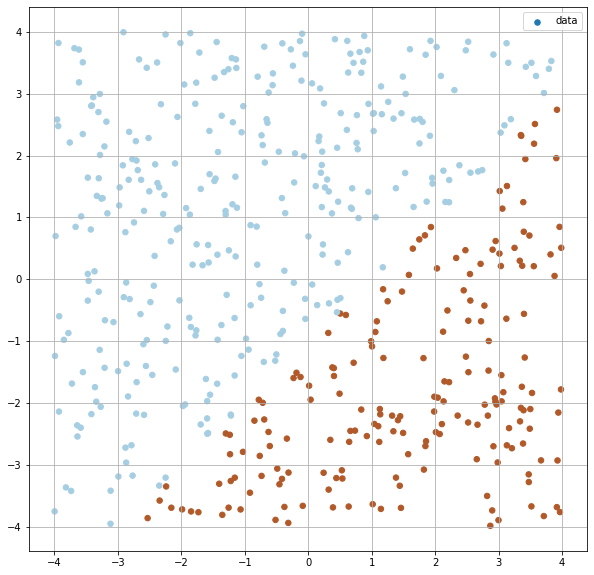

In [13]:
plot_binary(dataset)

In [14]:
model = SVC(kernel="linear")

In [15]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

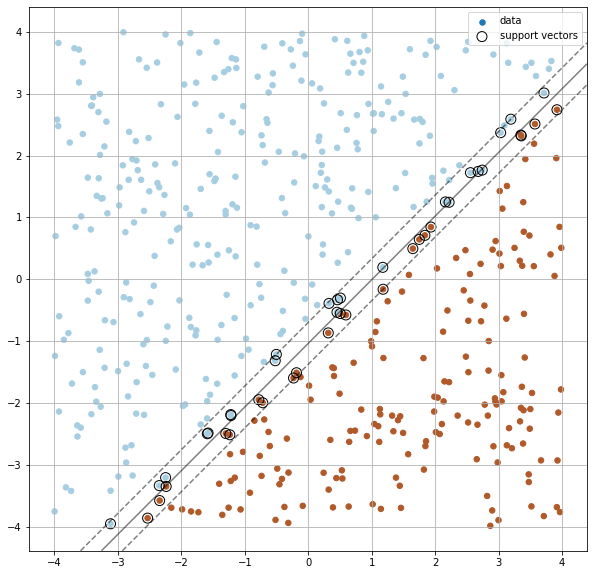

In [16]:
plot_binary(dataset, model)

In [17]:
dataset = generate_binary_dataset(-2, 2, 500, lambda x, y: x ** 2 + y ** 2 < 1)
dataset.head()

x         y  target
0  0.711366  1.666675    -1.0
1  1.532369  1.131873    -1.0
2  1.630274 -1.204763    -1.0
3 -0.688929 -1.788812    -1.0
4 -0.878254  0.633885    -1.0

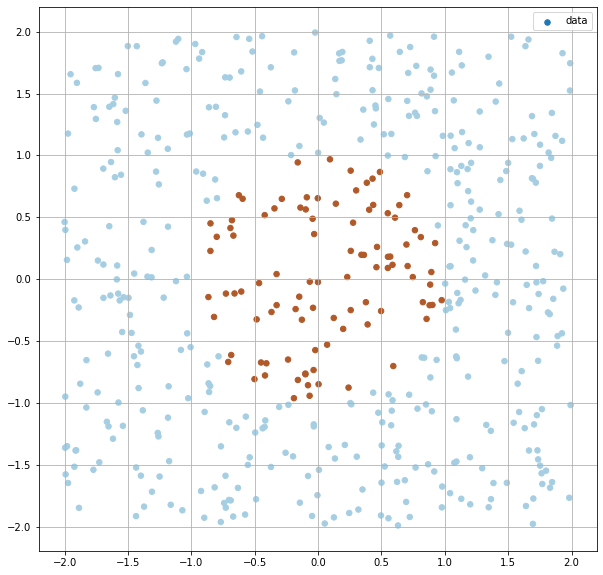

In [18]:
plot_binary(dataset)

In [19]:
model = SVC(kernel='rbf')

In [20]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

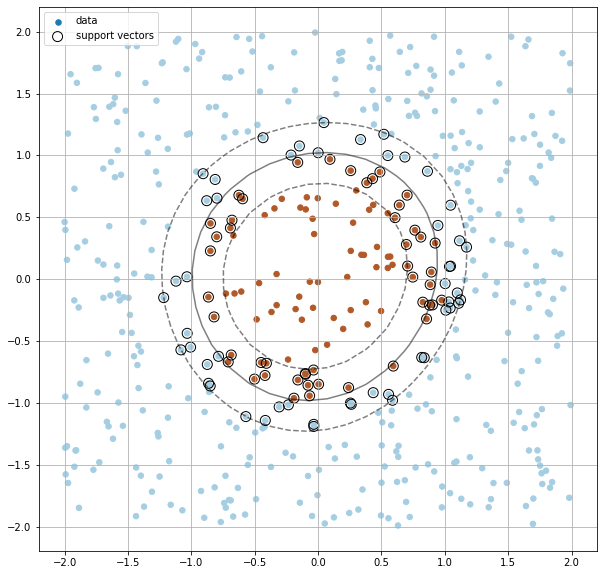

In [21]:
plot_binary(dataset, model)

In [22]:
dataset = generate_binary_dataset(-3, 3, 500, lambda x, y: x ** 2 - y ** 2 < 1)
dataset.head()

x         y  target
0  1.577997  0.807606    -1.0
1  0.628478 -2.774973     1.0
2  2.633987  2.468088     1.0
3 -0.392841  1.080359     1.0
4  0.573358  0.538079     1.0

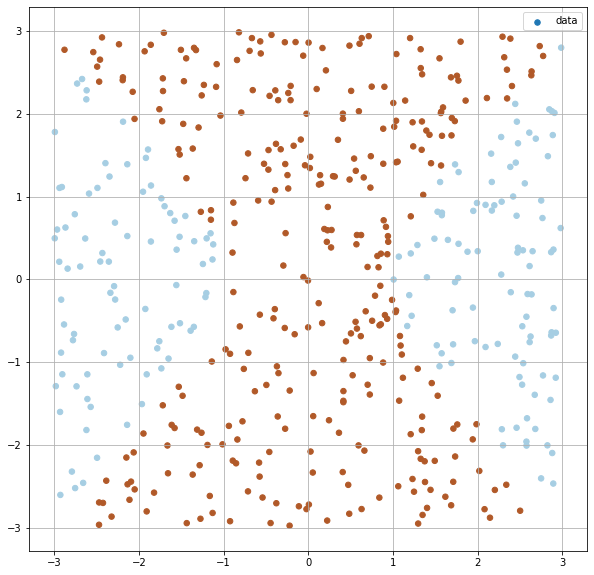

In [23]:
plot_binary(dataset)

In [51]:
model = SVC(kernel='rbf', C=10)

In [52]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

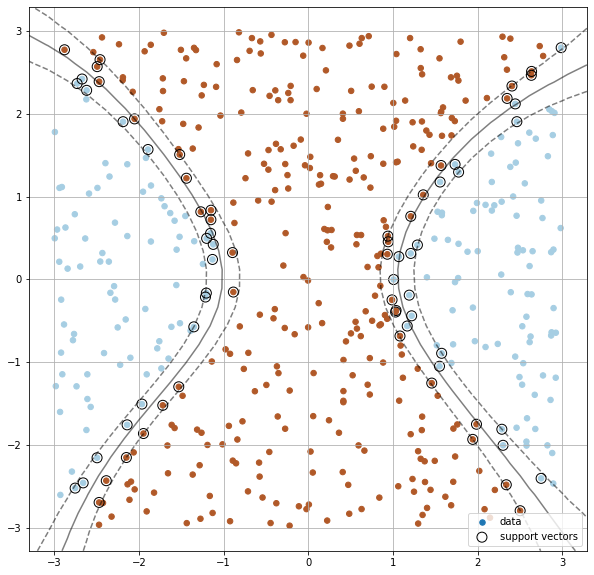

In [53]:
plot_binary(dataset, model)

In [85]:
dataset = generate_binary_dataset(-5, 5, 1000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 3) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 3))
dataset.head()

x         y  target
0  0.908553  3.216517    -1.0
1  4.180894  4.171914    -1.0
2  0.371760 -1.889337    -1.0
3  0.159196 -1.228881    -1.0
4 -2.459665  4.763577    -1.0

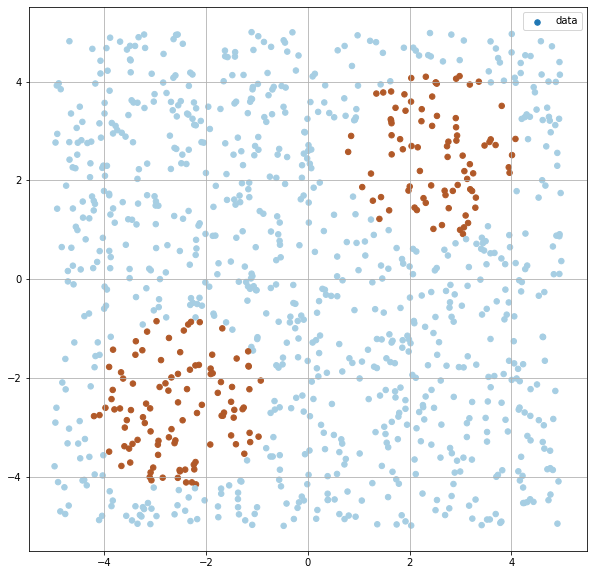

In [86]:
plot_binary(dataset)

In [87]:
model = SVC(kernel='rbf', tol=1e-11, C=5)

In [88]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-11, verbose=False)

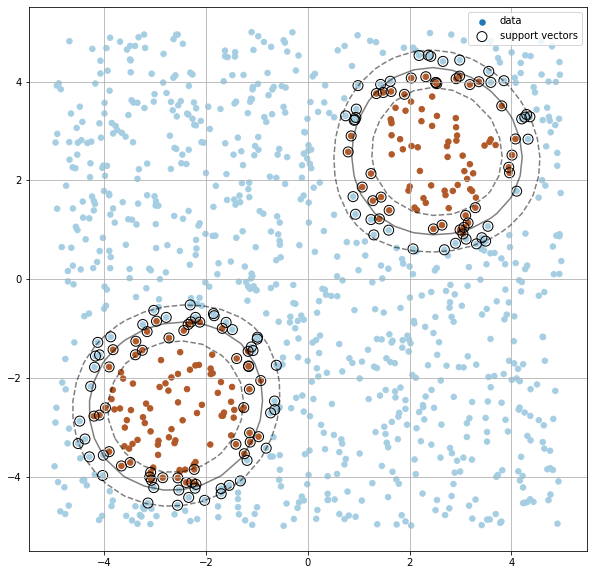

In [89]:
plot_binary(dataset, model)

In [90]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 2.5) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 2.5) | ((x - 2.5) ** 2 + (y + 2.5) ** 2 < 2.5) | ((x + 2.5) ** 2 + (y - 2.5) ** 2 < 2.5))
dataset.head()

x         y  target
0  1.119456  1.133917    -1.0
1  3.950241 -4.300848    -1.0
2  3.089532  0.631417    -1.0
3  3.959307 -4.532253    -1.0
4 -1.784286 -0.926546    -1.0

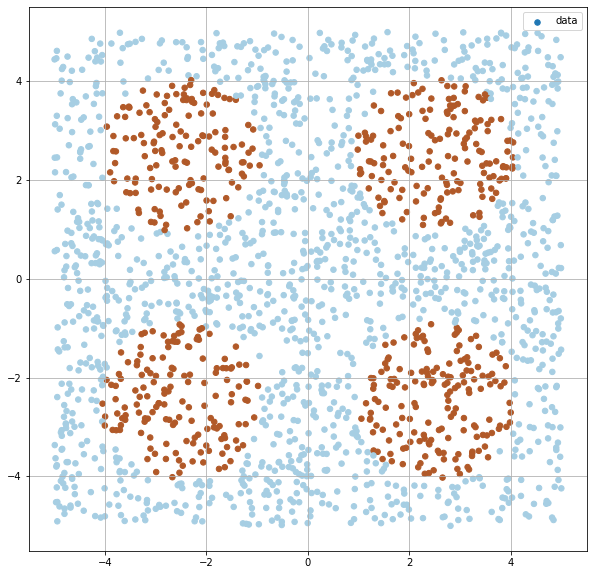

In [91]:
plot_binary(dataset)

In [92]:
model = SVC(kernel='rbf', tol=1e-12, C=10)

In [93]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-12, verbose=False)

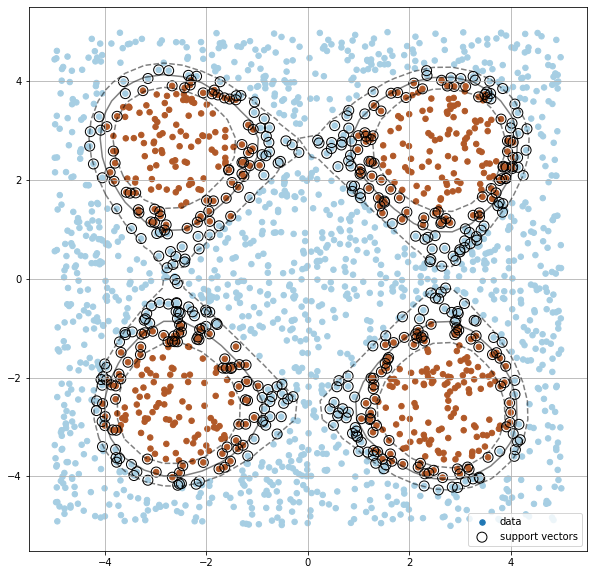

In [94]:
plot_binary(dataset, model)

In [95]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: np.abs(x - y) > 2)
dataset.head()

x         y  target
0  3.998807  4.978932    -1.0
1 -3.152069  4.175288     1.0
2 -1.800312 -4.722647     1.0
3 -0.701373 -0.962418    -1.0
4 -4.305558 -3.573745    -1.0

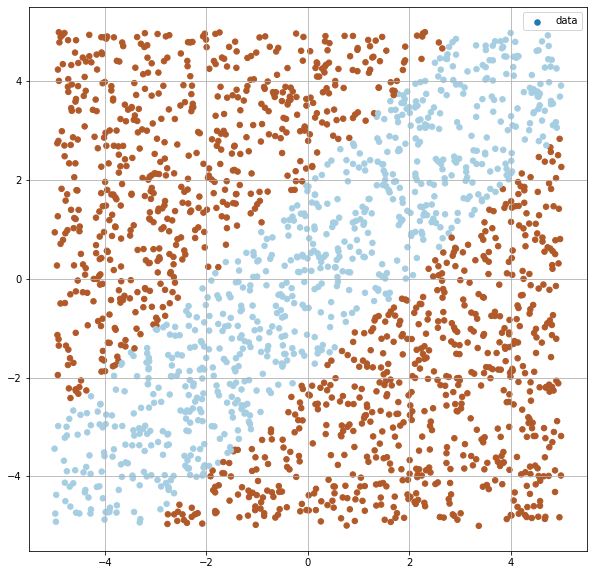

In [96]:
plot_binary(dataset)

In [97]:
model = SVC(kernel='poly', degree=2, tol=1e-3)

In [98]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

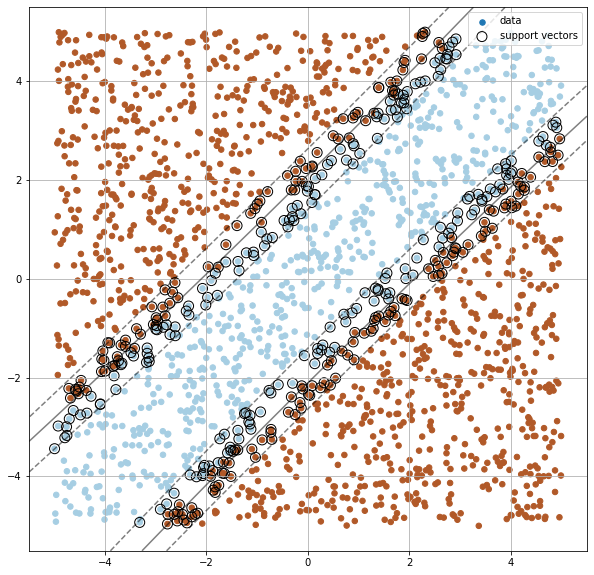

In [99]:
plot_binary(dataset, model)

In [105]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: x * y > 0)
dataset.head()

x         y  target
0 -2.201245 -0.462957     1.0
1  1.145537  0.240512     1.0
2  2.700958 -3.254947    -1.0
3  0.778981 -4.708636    -1.0
4 -1.529360 -2.120830     1.0

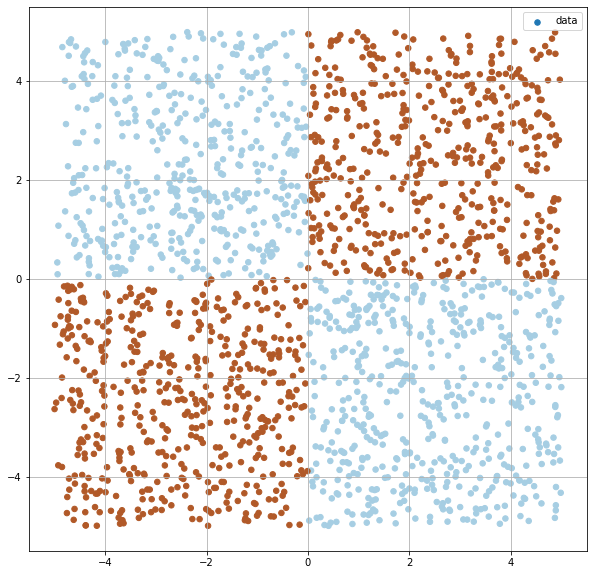

In [106]:
plot_binary(dataset)

In [125]:
model = SVC(kernel='poly', degree=2, tol=1e-7)

In [126]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-07, verbose=False)

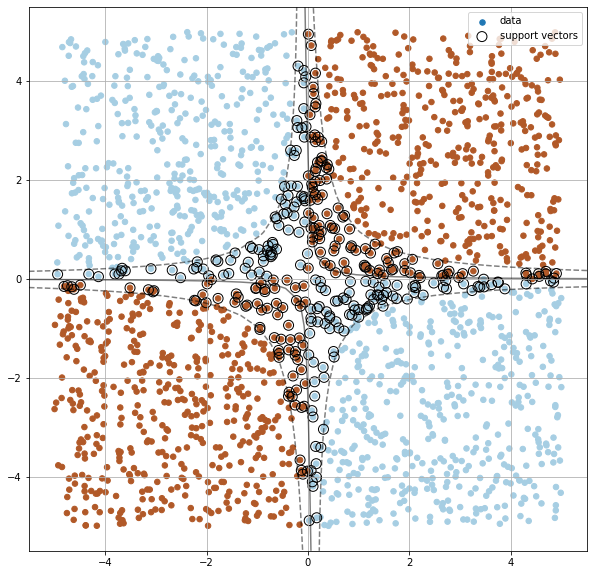

In [127]:
plot_binary(dataset, model)

In [128]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: x * y * (np.abs(x) - np.abs(y)) > 0)
dataset.head()

x         y  target
0 -4.650993 -2.869596     1.0
1 -2.170059  3.642588     1.0
2 -2.201380  3.319934     1.0
3  1.699066 -0.215868    -1.0
4 -3.082438  3.859474     1.0

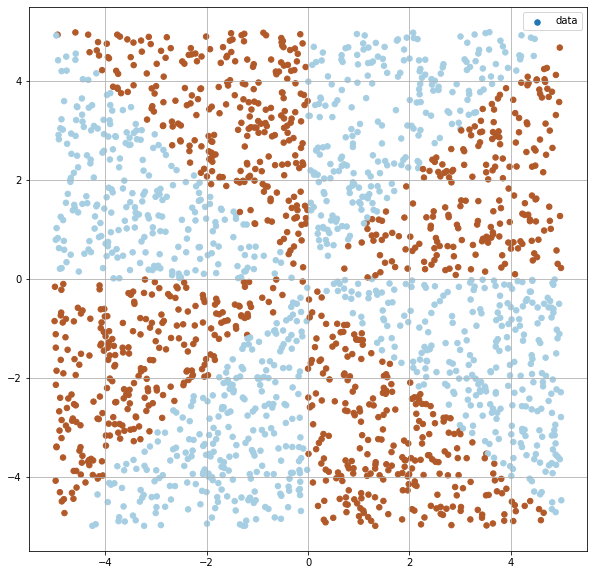

In [129]:
plot_binary(dataset)

In [130]:
model = SVC(kernel='poly', degree=4, tol=1e-12)

In [131]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-12, verbose=False)

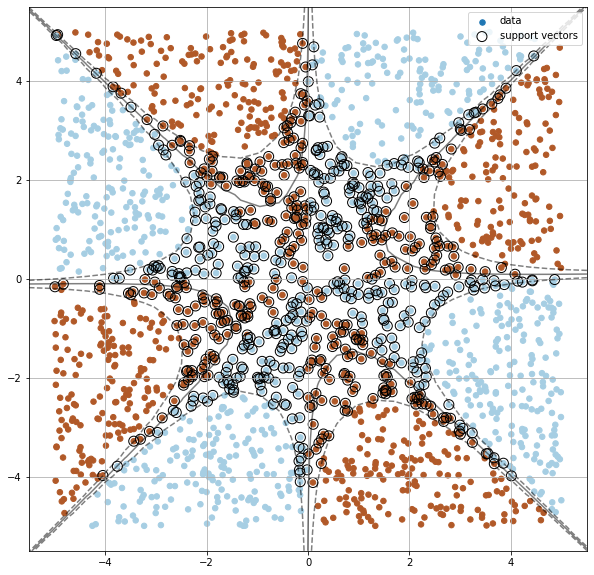

In [132]:
plot_binary(dataset, model)

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train = X_train.reshape(60000, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(10000, 28 * 28).astype('float32') / 255

#### Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [12]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4], 'C': [5, 10]}]

# specify model
model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = 8,
                        return_train_score=True)  

In [13]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed: 277.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [18]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     939.977054     14.513710       402.346043        3.567782       5   
1    1261.009300     39.522770       585.482721       86.400542       5   
2    2897.834649     45.617691       907.256302        9.880219       5   
3     913.593682    105.982031       422.710137       38.868092      10   
4    1001.112001     10.121563       450.532688       17.647825      10   
5    1571.037997    224.133007       602.890242       50.851582      10   

  param_gamma                      params  split0_test_score  \
0        0.01     {'C': 5, 'gamma': 0.01}           0.982667   
1       0.001    {'C': 5, 'gamma': 0.001}           0.948000   
2      0.0001   {'C': 5, 'gamma': 0.0001}           0.921750   
3        0.01    {'C': 10, 'gamma': 0.01}           0.982333   
4       0.001   {'C': 10, 'gamma': 0.001}           0.953583   
5      0.0001  {'C': 10, 'gamma': 0.0001}           0.928083   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.981500           0.983750  ...         0.981683        0.001379   
1           0.948000           0.949500  ...         0.948450        0.000552   
2           0.922833           0.926917  ...         0.923200        0.001908   
3           0.981500           0.984917  ...         0.981950        0.001688   
4           0.955417           0.955250  ...         0.954433        0.000824   
5           0.927583           0.932333  ...         0.929283        0.001699   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.998062            0.998042   
1                4            0.955667            0.954750   
2                6            0.925125            0.925604   
3                1            0.999500            0.999687   
4                3            0.963396            0.963354   
5                5            0.932708            0.933042   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.997792            0.998146            0.998125   
1            0.954542            0.954625            0.954937   
2            0.924562            0.925063            0.925625   
3            0.999583            0.999583            0.999521   
4            0.963208            0.963292            0.963812   
5            0.931396            0.931958            0.933000   

   mean_train_score  std_train_score  
0          0.998033         0.000127  
1          0.954904         0.000404  
2          0.925196         0.000394  
3          0.999575         0.000065  
4          0.963413         0.000210  
5          0.932421         0.000643  

[6 rows x 22 columns]

In [ ]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(10, 7))

plt.scatter(cv_results['param_gamma'], )

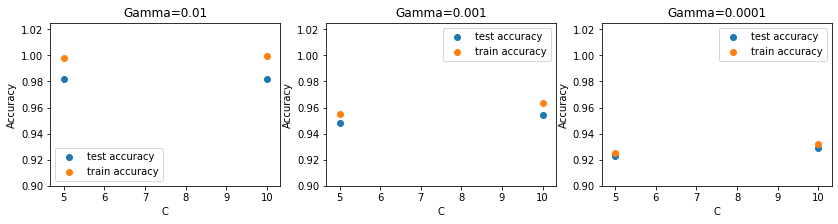

In [41]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(14,3))

for i in range(3):
    plt.subplot(131 + i)
    gamma = cv_results[cv_results['param_gamma'] == hyper_params[0]['gamma'][i]]

    plt.scatter(gamma["param_C"], gamma["mean_test_score"], label='test accuracy')
    plt.scatter(gamma["param_C"], gamma["mean_train_score"], label='train accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(f"Gamma={hyper_params[0]['gamma'][i]}")
    plt.ylim([0.9, 1.025])

    plt.legend()

In [16]:
model_cv.best_score_

0.98195

In [17]:
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [26]:
y_pred = model_cv.best_estimator_.predict(X_test)
y_pred.shape

(10000,)

In [29]:
metrics.accuracy_score(y_test, y_pred)

0.9833

In [30]:
def draw(images, texts, columns=1, rows=1):
    fig = plt.figure(figsize=(4 * columns, 4 * rows))

    for i in range(columns * rows):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(texts[i])
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(images[i].reshape(28, 28) * 255)

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.show()

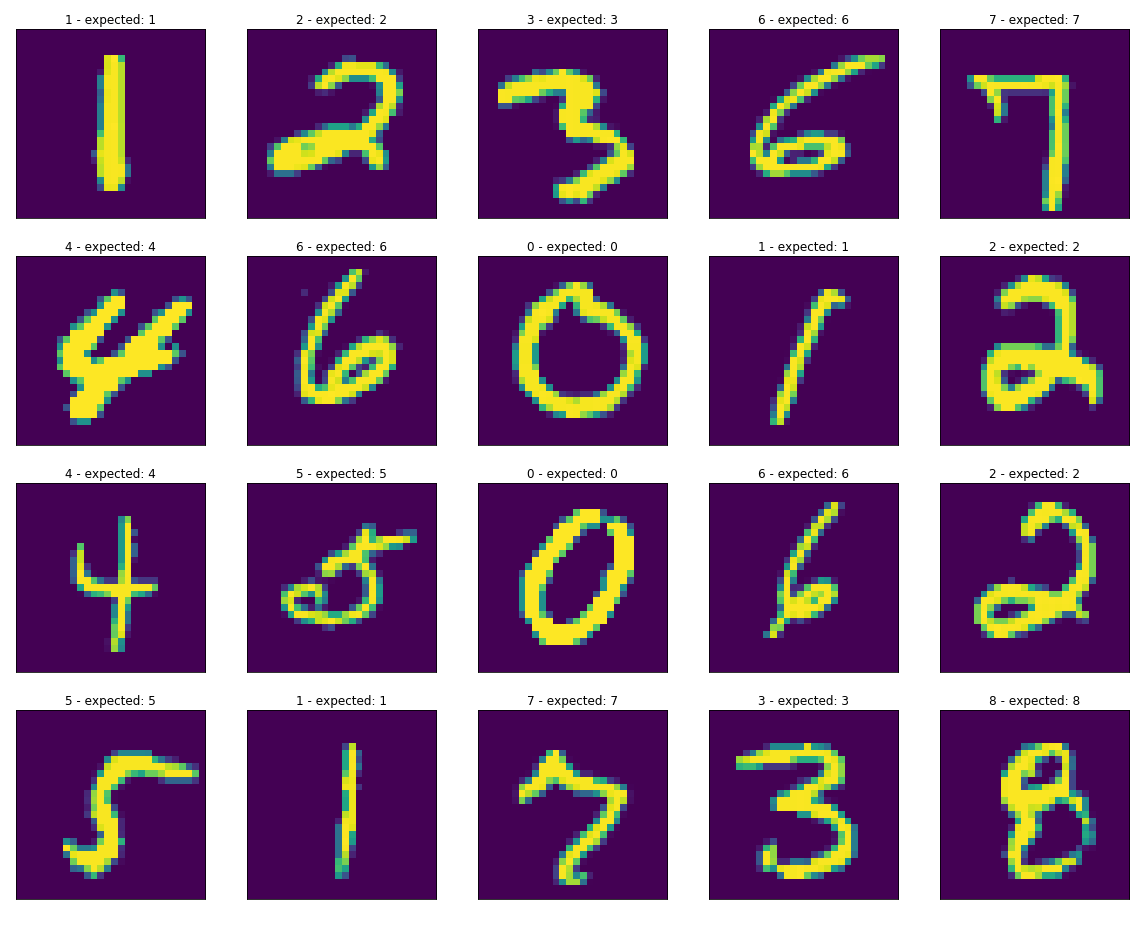

In [36]:
indices = np.random.choice(np.arange(len(X_test)), size=20)
images = X_test[indices]
predicted_digits = y_pred[indices]
texts = [f'{predicted_digits[i]} - expected: {y_test[indices[i]]}' for i in range(len(indices))]

draw(images, texts, 5, 4)